In [1]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 20.1 MB/s 


In [2]:
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk
from nltk.corpus import stopwords
# Corpus Processing
import re
import nltk.corpus
from unidecode import unidecode
import unicodedata
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import string
from string import punctuation

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
proj_extensao = pd.read_json("/content/drive/MyDrive/extensão.json")
proj_extensao

,resumo,fim_execucao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus
0,Resumo\r\n \r\nDois elementos inspiram a propo...,2012-12-14,EDUCAÇÃO,"O ensino-aprendizagem de inglês, hoje, no Bras...",Priscila Tiziana Seabra Marques da Silva,10,2012-05-01,"Educação, Indústria, Construção Civil, Recurso...","Rafael Costa Varela, Aline Alves de Macedo, Pr...",Teachers' Learning Center,SGA
1,"De acordo com o PPP do IFRN, e sendo a Extensã...",2012-12-31,ENGENHARIA CIVIL,"Este projeto de extensão, vinculado ao Núcleo ...",Aldan Nobrega Borges,11,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...","Joatã da Paz Gois, Fernanda Karen Melo da Cost...",NEPP - NUCLEO DE EXTENSAO E PRATICA PROFISSIONAL,CNAT
2,O presente projeto pretende dar uma acessoria ...,2012-12-31,ARQUITETURA E URBANISMO,Como a terceira idade passa por alterações ana...,Joana Darc da Costa Silva,12,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...","Erica Ricelle Costa e Silva, Deivison Luan Xav...",Bem estar na terceira idade,CNAT
3,O projeto apresentado objetiva a capacitação d...,2012-12-31,ADMINISTRAÇÃO,O projeto em foco tem como finalidade ofertar ...,Jorge Fernandes Jales Neto,13,2012-06-01,"Indústria, Construção Civil e Petróleo e Gás","Jorge Fernandes Jales Neto, Antonio Claudio No...",Qualificação em Processos Licitatórios do Gove...,MO
4,RESUMO\r\n\r\n\r\n A dificuldade no aprendiza...,2012-12-30,MATEMÁTICA,JUSTIFICATIVA\r\n\r\nAo longo da vida escolar ...,Gilberto Fernandes do Nascimento,14,2012-04-16,"Educação, Indústria, Construção Civil, Recurso...",Gilberto Fernandes do Nascimento,ESTIMULANDO O APRENDIZADO DE MATEMÁTICA,SGA
...,...,...,...,...,...,...,...,...,...,...,...
3217,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,ENGENHARIA DE PRODUÇÃO,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,Gestão e Infraestrutura,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,SGA
3218,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,MATEMÁTICA,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,"Educação, Indústria, Construção Civil, Recurso...","Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,CNAT
3219,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,Agroecologia e Cerâmica,Alan Klinger Sousa Alves,Escape room de informática,IP
3220,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,BIOTECNOLOGIA,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,Agroecologia e Cerâmica,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,IP


In [26]:
# Utilizamos a função groupby passando o nome da coluna que queremos usar para agrupar e ver quantas e quais são as áreas de conhecimento
g = proj_extensao.groupby('area_conhecimento')
g.describe().head(60)

id                            \
                                            count         mean          std   
area_conhecimento                                                             
ADMINISTRAÇÃO                               130.0  2714.461538  1385.640004   
AGRONOMIA                                    46.0  2011.434783  1496.916648   
ANTROPOLOGIA                                 10.0  2725.000000   715.516441   
ARQUITETURA E URBANISMO                      18.0  2756.888889  1454.646506   
ARTES                                       286.0  2503.041958  1387.140893   
ASTRONOMIA                                   17.0  2403.411765  1228.023466   
BIOLOGIA GERAL                               21.0  1692.380952  1601.291275   
BIOQUÍMICA                                    2.0  4327.500000   201.525433   
BIOTECNOLOGIA                                 5.0  1933.200000  1694.081964   
BOTÂNICA                                      1.0  3154.000000          NaN   
CIÊNCIA DA COMPUTAÇÃO                       309.0  2645.436893  1372.820724   
CIÊNCIA DA INFORMAÇÃO                        27.0  2372.444444  1434.434821   
CIÊNCIA E TECNOLOGIA DE ALIMENTOS            53.0  2215.792453  1359.512064   
CIÊNCIA POLÍTICA                             12.0  2549.083333  1451.357262   
COMUNICAÇÃO                                  57.0  2796.298246  1430.897345   
DESENHO INDUSTRIAL                            7.0  2669.000000  1348.051186   
DIREITO                                       4.0  1597.500000  1498.360993   
ECOLOGIA                                     27.0  2296.629630  1550.306946   
ECONOMIA                                      5.0  1343.600000  1505.712057   
EDUCAÇÃO                                    344.0  2537.084302  1400.238691   
EDUCAÇÃO FÍSICA                             206.0  2378.504854  1487.197130   
ENFERMAGEM                                    3.0  1072.000000  1066.806918   
ENGENHARIA AGRÍCOLA                           3.0  1911.333333  1040.992475   
ENGENHARIA BIOMÉDICA                         16.0  3536.375000  1010.562673   
ENGENHARIA CIVIL                             41.0  2606.121951  1255.272166   
ENGENHARIA DE MATERIAIS E METALÚRGICA         2.0   990.000000  1183.696752   
ENGENHARIA DE MINAS                           6.0  2117.500000  1685.608822   
ENGENHARIA DE PRODUÇÃO                       24.0  2894.458333  1620.496837   
ENGENHARIA DE TRANSPORTES                     5.0  2513.200000  1057.731157   
ENGENHARIA ELÉTRICA                          67.0  2429.373134  1476.640924   
ENGENHARIA MECÂNICA                          24.0  3132.083333  1086.656416   
ENGENHARIA QUÍMICA                            7.0  2124.000000  1523.664661   
ENGENHARIA SANITÁRIA                         27.0  1874.888889  1478.674155   
ENSINO                                      113.0  2859.230088  1363.950604   
FILOSOFIA                                    29.0  3076.517241   974.166663   
FÍSICA                                       62.0  2776.112903  1154.680200   
GENÉTICA                                      1.0   606.000000          NaN   
GEOCIÊNCIAS                                  29.0  3008.137931  1454.135647   
GEOGRAFIA                                    20.0  1984.500000  1447.970358   
HISTÓRIA                                     28.0  1712.892857  1467.620305   
INTERDISCIPLINAR                            266.0  2772.511278  1321.173758   
LETRAS                                       90.0  2490.455556  1381.703957   
LINGUÍSTICA                                  59.0  2320.983051  1398.692080   
MATEMÁTICA                                  123.0  2248.723577  1495.106385   
MATERIAIS                                    11.0  2601.363636  1636.723023   
MEDICINA VETERINÁRIA                         10.0  1494.000000  1632.040236   
MICROBIOLOGIA                                 1.0  3860.000000          NaN   
MUSEOLOGIA                                   13.0  2985.923077   783.395437   
NUTRIÇÃO          

In [17]:
options = ['NUTRIÇÃO', 'MEDICINA', 'ENFERMAGEM', 'ODONTOLOGIA','PSICOLOGIA', 'FARMÁCIA','FONOAUDIOLOGIA','EDUCAÇÃO FÍSICA','SAÚDE COLETIVA']
# selecting rows based on condition
saude = proj_extensao[proj_extensao['area_conhecimento'].isin(options)]

In [21]:
saude

,resumo,fim_execucao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus
7,"Na sociedade globalizada, centrada no mercado,...",2012-12-21,EDUCAÇÃO FÍSICA,"Na sociedade globalizada, centrada no mercado,...",Flavio Alexandre Nunes de Franca,18,2012-06-01,"Cultura, Turismo e Lazer","Glênio Almeida de Freitas, Flavio Alexandre Nu...",Programa de Atendimento ao Idoso,CA
21,"Diante de um mundo ágil e dinâmico, os profiss...",2012-12-31,PSICOLOGIA,Em função das grandes exigências e constantes ...,Etienne Andrade de Medeiros Dantas,36,2012-06-01,Gestão e Infraestrutura,Etienne Andrade de Medeiros Dantas,Pró-Vida e Carreira: Projeto de Orientação par...,JC
37,Ao observarmos que a maioria das escolas do go...,2012-12-31,EDUCAÇÃO FÍSICA,Envolver alunos da comunidade das escolas do G...,Dario Zivomar Flexa Maia,57,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...",Dario Zivomar Flexa Maia,Basquete como inclusão social,NC
40,Este projeto conta com a parceria entre o IFRN...,2012-12-30,EDUCAÇÃO FÍSICA,"De acordo com Nahas (2006), “modernamente, o...",Maria Elizabete Sobral Paiva de Aquino,61,2012-06-01,Controle e Processos Industriais e Gestão e Ne...,"Melquisedec Elias de Lima Pereira, João Victor...",VIDA SAUDAVEL NA MELHOR IDADE,JC
47,O Atletismo vem sendo utilizado pelo homem de...,2012-12-31,EDUCAÇÃO FÍSICA,"Ao ficar em pé o homem começou a caminhar, sal...",Zelma Wanderley de Farias Ribeiro,68,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...","Zelma Wanderley de Farias Ribeiro, Ivana Lucia...",Atletismo: Vamos fazer melhor!,CNAT
...,...,...,...,...,...,...,...,...,...,...,...
3158,<p>Turmas de pr&aacute;tica de Karat&ecirc; qu...,2019-12-05,EDUCAÇÃO FÍSICA,<p>As artes marciais promovem o bem estar f&ia...,Alessandro Nascimento dos Santos,4469,2019-03-05,Administração e Informática,"Alessandro Nascimento dos Santos, Joao Batista...",Karatê Dô: Samurais do Cabugi,LAJ
3173,"<p style=""text-align: justify;"">O projeto IV&n...",2020-02-14,EDUCAÇÃO FÍSICA,"<p style=""text-align: justify;"">&Eacute; verda...",Gustavo Andre Pereira de Brito,4486,2019-09-16,"Educação, Indústria, Construção Civil, Recurso...","Gustavo Andre Pereira de Brito, Alline Mayara ...",IV Colônia de Férias do IFRN CNAT,CNAT
3174,"<p style=""text-align: justify;"">O presente pro...",2020-05-24,EDUCAÇÃO FÍSICA,,Kadydja Karla Nascimento Chagas,4487,2018-05-24,"Cultura, Turismo e Lazer","WELLEM MARCILMA DA CONCEICAO, Debora Silva Bra...",PROGRAMA SEGUNDO TEMPO - PARADESPORTO,CAL
3182,<p>O presente projeto tem o prop&oacute;sito d...,2019-12-04,EDUCAÇÃO FÍSICA,"<p>Grande demanda, aepa&ccedil;o adequado e be...",Rosalva Alves Nunes,4495,2019-08-06,Agroindústria,Rosalva Alves Nunes,Nadando para vida,AP


In [24]:
#humanas = ['ADMINISTRAÇÃO', 'ARTES', 'DIREITO', 'COMUNICAÇÃO','CIÊNCIA POLÍTICA', 'ECONOMIA','EDUCAÇÃO','ENSINO','FILOSOFIA','HISTÓRIA','LETRAS','LINGUÍSTICA','SERVIÇO SOCIAL','SOCIOLOGIA']
# selecting rows based on condition
#ci_humanas = proj_extensao[proj_extensao['area_conhecimento'].isin(humanas)]
#ci_humanas

In [23]:
humanas = ['ADMINISTRAÇÃO', 'DIREITO', 'COMUNICAÇÃO','CIÊNCIA POLÍTICA', 'ECONOMIA','SERVIÇO SOCIAL','SOCIOLOGIA']
# selecting rows based on condition
ci_humanas = proj_extensao[proj_extensao['area_conhecimento'].isin(humanas)]
ci_humanas

,resumo,fim_execucao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus
3,O projeto apresentado objetiva a capacitação d...,2012-12-31,ADMINISTRAÇÃO,O projeto em foco tem como finalidade ofertar ...,Jorge Fernandes Jales Neto,13,2012-06-01,"Indústria, Construção Civil e Petróleo e Gás","Jorge Fernandes Jales Neto, Antonio Claudio No...",Qualificação em Processos Licitatórios do Gove...,MO
39,O projeto aborda a utilização de ferramentas d...,2012-12-31,COMUNICAÇÃO,Com o advento da internet 2.0 e da interativid...,Michelle Pinheiro Carvalho de Assis,60,2012-06-01,Informação e Comunicação e Controle e Processo...,Michelle Pinheiro Carvalho de Assis,Educomunicação: desenvolvendo a prática jornal...,PAR
43,o mercado de trabalho formal do setor da const...,2012-12-01,ECONOMIA,"A Construção Civil tem um papel social-urbano,...",Roberto Gomes Cavalcante Junior,64,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...",Roberto Gomes Cavalcante Junior,Qualidade do Emprego Formal no setor da Constr...,CNAT
85,A proposta do projeto é desconstruir as amarra...,2012-12-15,SOCIOLOGIA,A proposta do projeto é desconstrui...,Francisca Gomes Torres Filha,110,2012-05-15,Multidisciplinar,"Maria Taynara Ferreira Bezerra, Lucas Almeida ...",Na encruzilhada entre o feitiço e a realidade ...,MO
106,O projeto de integração do Campus Parnamirim c...,2012-12-31,COMUNICAÇÃO,A presença relativamente recente de um Campus ...,Alex de Alencar Cardoso do Nascimento,133,2012-06-01,Multidisciplinar,Alex de Alencar Cardoso do Nascimento,PROJETO DE INTEGRAÇÃO DO CAMPUS PARNAMIRIM COM...,PAR
...,...,...,...,...,...,...,...,...,...,...,...
3160,"<p style=""text-align:justify; margin:0cm 0cm 8...",2019-12-11,COMUNICAÇÃO,"<p style=""text-align:justify; margin:0cm 0cm 8...",Xenia Silva Gomes Brandao,4471,2019-02-11,Informação e Comunicação e Controle e Processo...,"Gleyciany Karley do Amarante Soares, Larissa O...",IFPAR abrindo portas,PAR
3180,"<p style=""text-align:justify; margin:0cm 0cm 8...",2019-11-29,ADMINISTRAÇÃO,"<p style=""text-align:justify; margin:0cm 0cm 8...",Luciana Guedes Santos,4493,2019-08-05,Gestão e Infraestrutura,"Nivalber Sales dos Santos, Geazi Rafael da Sil...",Logística Reversa: proposta de incentivo a ati...,SGA
3190,"<p style=""text-align: justify;"">&nbsp;&nbsp;&n...",2020-02-21,ADMINISTRAÇÃO,<p>&nbsp;&nbsp;&nbsp;&nbsp;Com a indissociabil...,Andre Luiz Azevedo Alcantara,4504,2019-08-21,Recursos Pesqueiros e Química,Andre Luiz Azevedo Alcantara,Hotel de projetos : fábrica de geração de empr...,MC
3195,"<p class=""western"" style=""margin-bottom: 0cm; ...",2019-11-30,SOCIOLOGIA,"<p class=""western"" style=""margin-bottom: 0cm; ...",Mauricio Bernardino Goncalves,4509,2019-08-01,Meio Ambiente e Construção Civil,"Francimeire Dias dos Santos, Ivanesse Pereira ...",Cine Potengi,SPP


In [25]:
naturais = ['ASTRONOMIA', 'BIOLOGIA', 'BIOQUÍMICA', 'BOTÂNICA','FÍSICA', 'QUÍMICA','GEOLOGIA','OCEANOGRAFIA','GEOCIENCIAS','MICROBIOLOGIA',]
# selecting rows based on condition
natureza = proj_extensao[proj_extensao['area_conhecimento'].isin(naturais)]
natureza

,resumo,fim_execucao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus
16,É consenso que a experimentação desp...,2012-12-31,QUÍMICA,"No ano de 2010, foi realizado um trabalho...",Luiz Carlos Domingos Batista,29,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...",Luiz Carlos Domingos Batista,Química Intinerante,JC
30,"A mostra de Física Experimental, é uma ativida...",2012-12-31,FÍSICA,1. INTRODUÇÃO \r\n\r\nA Física é uma ciência d...,Jacques Cousteau da Silva Borges,50,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...","Walton Claudio Loureiro Costa Junior, Stefany ...",MOSTRA ANUAL DE FÍSICA DO RIO GRANDE DO NORTE,CNAT
58,fghfgh,2012-12-31,OCEANOGRAFIA,fghfgh,Joao Correia Saraiva Junior,80,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...",Joao Correia Saraiva Junior,fghfgh,CNAT
60,Não há dúvidas sobre a importância e a necessi...,2012-12-01,QUÍMICA,Muitas dificuldades ocorrem no trato do referi...,Jackson da Silva Santos,82,2012-06-01,Informática e Serviços,"Maria Thereza dos Santos Silva, Iara Kadmar Es...",A COMPUTAÇÃO COMO FERRAMENTA PARA O ENSINO DE ...,CN
63,O uso de computadores tem adquirido suma impor...,2012-12-20,QUÍMICA,"Em muitas escolas da nossa região, o ensino da...",Marco Antonio de Abreu Viana,86,2012-06-05,"Mineração, Alimentos e Informática","Maria Luiza de Holanda Balbino, Lucas de Medei...",SOFTWARE EDUCAIONAL PARA O ENSINO DE QUÍMICA,CN
...,...,...,...,...,...,...,...,...,...,...,...
3068,<p>A carna&uacute;ba (<em>Copernicia prunifera...,2020-04-01,QUÍMICA,"<p style=""text-align:justify"">A carna&uacute;b...",Francisco Felipe Maia da Silva,4374,2019-04-01,Agroindústria,Francisco Felipe Maia da Silva,PRODUÇÃO DE EMULSÕES DE CERA DE CARNAUBA (Cope...,AP
3087,"<p style=""text-align: justify;"">O presente pro...",2019-07-01,FÍSICA,"<p style=""text-align: justify;"">Durante a form...",Rhodriggo Mendes Virginio,4394,2019-04-08,Indústria e Têxtil,"JHONATTAN DINIZ DE OLIVEIRA LIBANIO, WANDRESSO...",Suporte ao professor de Física - Licenciatura ...,CA
3137,"<p style=""text-align: justify;"">A &aacute;gua ...",2020-05-30,QUÍMICA,"<p style=""text-align: justify;"">O monitorament...",Francisco Felipe Maia da Silva,4446,2019-06-01,Agroindústria,Francisco Felipe Maia da Silva,Análise físico-química e microbiológica da águ...,AP
3159,"<p style=""text-align: justify;""><span style=""f...",2019-12-23,BIOQUÍMICA,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Paulo Augusto de Lima Filho,4470,2019-06-10,Indústria e Serviços,"Moisés da Rocha Soares, Paulo Augusto de Lima ...",Experimente com a gente: IFRN Campus Santa Cruz,SC


In [28]:
#seleção de valores do dataset com as subáreas selecionadas
areas = ['ASTRONOMIA', 'BIOLOGIA', 'BIOQUÍMICA', 'BOTÂNICA','FÍSICA','QUÍMICA','GEOLOGIA','OCEANOGRAFIA','GEOCIENCIAS','MICROBIOLOGIA',
         'ADMINISTRAÇÃO', 'DIREITO', 'COMUNICAÇÃO','CIÊNCIA POLÍTICA', 'ECONOMIA','SERVIÇO SOCIAL','SOCIOLOGIA',
         'NUTRIÇÃO', 'MEDICINA', 'ENFERMAGEM', 'ODONTOLOGIA','PSICOLOGIA', 'FARMÁCIA','FONOAUDIOLOGIA','EDUCAÇÃO FÍSICA','SAÚDE COLETIVA']
# selecting rows based on condition
tres_areas = proj_extensao[proj_extensao['area_conhecimento'].isin(areas)]
tres_areas

,resumo,fim_execucao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus
3,O projeto apresentado objetiva a capacitação d...,2012-12-31,ADMINISTRAÇÃO,O projeto em foco tem como finalidade ofertar ...,Jorge Fernandes Jales Neto,13,2012-06-01,"Indústria, Construção Civil e Petróleo e Gás","Jorge Fernandes Jales Neto, Antonio Claudio No...",Qualificação em Processos Licitatórios do Gove...,MO
7,"Na sociedade globalizada, centrada no mercado,...",2012-12-21,EDUCAÇÃO FÍSICA,"Na sociedade globalizada, centrada no mercado,...",Flavio Alexandre Nunes de Franca,18,2012-06-01,"Cultura, Turismo e Lazer","Glênio Almeida de Freitas, Flavio Alexandre Nu...",Programa de Atendimento ao Idoso,CA
8,Aborda a questão da prática da atividade físic...,2012-12-31,SAÚDE COLETIVA,De acordo Cattean e Garoff (1999) Nadar á prat...,Edna de Oliveira Evaristo,19,2012-06-04,"Cultura, Turismo e Lazer","Rodolfo Duarte dos Santos Araujo da Silva, Ren...",NADO-HIDRO: a atividade aquática de natação e ...,CNAT
16,É consenso que a experimentação desp...,2012-12-31,QUÍMICA,"No ano de 2010, foi realizado um trabalho...",Luiz Carlos Domingos Batista,29,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...",Luiz Carlos Domingos Batista,Química Intinerante,JC
19,A pressão da modernidade representada pela inf...,2012-12-31,SAÚDE COLETIVA,A segurança no local de trabalho...,Miguel Cabral de Macedo Neto,33,2012-06-01,Multidisciplinar,"Kevia Kenny Barbosa de Oliveira, Francisco Rob...",O ENSINO A DISTANCIA NAS COMUNIDADES DE ASSU E...,ZL
...,...,...,...,...,...,...,...,...,...,...,...
3182,<p>O presente projeto tem o prop&oacute;sito d...,2019-12-04,EDUCAÇÃO FÍSICA,"<p>Grande demanda, aepa&ccedil;o adequado e be...",Rosalva Alves Nunes,4495,2019-08-06,Agroindústria,Rosalva Alves Nunes,Nadando para vida,AP
3190,"<p style=""text-align: justify;"">&nbsp;&nbsp;&n...",2020-02-21,ADMINISTRAÇÃO,<p>&nbsp;&nbsp;&nbsp;&nbsp;Com a indissociabil...,Andre Luiz Azevedo Alcantara,4504,2019-08-21,Recursos Pesqueiros e Química,Andre Luiz Azevedo Alcantara,Hotel de projetos : fábrica de geração de empr...,MC
3195,"<p class=""western"" style=""margin-bottom: 0cm; ...",2019-11-30,SOCIOLOGIA,"<p class=""western"" style=""margin-bottom: 0cm; ...",Mauricio Bernardino Goncalves,4509,2019-08-01,Meio Ambiente e Construção Civil,"Francimeire Dias dos Santos, Ivanesse Pereira ...",Cine Potengi,SPP
3204,"<h1 style=""margin-top:0cm; margin-right:0cm; m...",2019-12-20,EDUCAÇÃO FÍSICA,"<p><span style=""font-size:24pt""><span style=""b...",Anna Karina Vasconcelos Nascimento Trindade,4518,2019-08-20,Serviços,"Anna Karina Vasconcelos Nascimento Trindade, J...",Iniciação ao Atletismo,NC


In [ ]:
tres_areas["resumo"]

0       Resumo\r\n \r\nDois elementos inspiram a propo...
1       De acordo com o PPP do IFRN, e sendo a Extensã...
2       O presente projeto pretende dar uma acessoria ...
3       O projeto apresentado objetiva a capacitação d...
4       RESUMO\r\n\r\n\r\n A dificuldade no aprendiza...
                              ...                        
3217    <p style="text-align: justify;"><span style="f...
3218    <p style="text-align: justify;">O projeto &ldq...
3219    <p align="justify" class="western" style="marg...
3220    <p>A educa&ccedil;&atilde;o ambiental &eacute;...
3221    <p class="MsoNoSpacing" style="margin:0cm; mar...
Name: resumo, Length: 3222, dtype: object

Criação do corpus de documentos

In [29]:
corpus = tres_areas['resumo'].tolist()
corpus[18][0:447]

'O presente projeto de extensão “agua vida” e um projeto que propõe a melhoria da qualidade de vida dos servidores do IFRN campus Pau dos Ferros, e comunidade localatravés de praticas corporais aquática. Tem como objetivo; Oportunizar aos servidores do IFRN campus Pau dos Ferros e comunidade local o acesso à atividade física sistematizada e orientada, na tentativa de minimizar os efeitos do sedentarismo, contribuindo para melhoria das relações '

# Pré-processamento

## Definição das funções para algumas técnicas de pré-porocessamento de texto

In [30]:
# deixa todas as letras das palavras em caixa baixa (lowercase)
def lowercase(listOfTokens):
    if type(listOfTokens) == str:
      return listOfTokens.lower()
    else:
      return [text.lower() for text in listOfTokens]

# remove stopwords da lista já tokenizada
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# aplica stemming
#def applyStemming(listOfTokens, stemmer):
#    return [stemmer.stem(token) for token in listOfTokens]

# remove qualquer palavra com menos de 2 e mais de 21 letras
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

## Função principal

Realiza, de fato, o pré-processamento do texto

In [44]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    area_conhecimento = proj_extensao['area_conhecimento']  
    other_words = open('file.txt') # Carregando arquivo .txt 
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Remove vírgulas
        corpus[index] = corpus[index].rstrip('\n')              # Remove quebras de linha
        corpus[index] = corpus[index].rstrip('\r')              # Remove quebras de linha
        corpus[index] = corpus[index].casefold()                # Aplica lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # remove characteres especiais, deixando apenas palavras
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # remove números e palavras concatenadas com números
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # remove emails e palavras com @
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # remove URLs com http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # remove URLs com www
        corpus[index] = re.sub(r'resumo', '', corpus[index])
        corpus[index] = re.sub(r'nbsp', '', corpus[index])      #remove expressões incomuns e sem significado presentes nos documentos
        corpus[index] = re.sub(r'nbspnbsp', '', corpus[index])
        corpus[index] = re.sub(r'jahkajnbsp', '', corpus[index])
        corpus[index] = re.sub(r'xxxxxxx', '', corpus[index])
        corpus[index] = re.sub(r'div', '', corpus[index])
        corpus[index] = re.sub(r'ifrnnbsp', '', corpus[index])
        corpus[index] = re.sub(r'<.*?>', '', corpus[index])
        corpus[index] = re.sub(r'[^\w\s]', '', corpus[index])
        corpus[index] = re.sub(r'<code>(.|(\n))*?</code>', '', corpus[index])
        
        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = removeWords(listOfTokens, area_conhecimento)
        listOfTokens = removeWords(listOfTokens, other_words)
        
        #listOfTokens = lowercase(listOfTokens)
        listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])
        corpus[index] = unicodedata.normalize("NFD", corpus[index])
        corpus[index] = corpus[index].encode("ascii", "ignore")
        corpus[index] = corpus[index].decode("utf-8")

    return corpus


In [45]:
language = 'portuguese'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

'presente projeto extensao agua vida projeto propoe melhoria qualidade vida servidores ifrn campus pau ferros comunidade localatraves praticas corporais aquatica objetivo oportunizar servidores ifrn campus pau ferros comunidade local acesso atividade fisica sistematizada orientada tentativa minimizar efeitos sedentarismo contribuindo melhoria relacoes interpessoais bem controle peso corporal alivio estresse hipertrofia muscular proporcionando melhor desempe'

## Ponderação estatística das palavras (TF-IDF)

In [46]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

717 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
efetivar,0.326169,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
objetiva,0.236050,0.0,0.065256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.078867,0.0,0.0,0.0,0.0,0.0,0.0,0.077085
administradores,0.188127,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
certames,0.177046,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
contratacoes,0.177046,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [47]:
#first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
efetivar,0.326169,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
objetiva,0.236050,0.0,0.065256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.078867,0.0,0.0,0.0,0.0,0.0,0.0,0.077085
administradores,0.188127,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
certames,0.177046,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
contratacoes,0.177046,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Clusterização

In [48]:
#Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result

def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init =  'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results


In [49]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

## Silhouette score

In [50]:
#Silhouette Score

def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


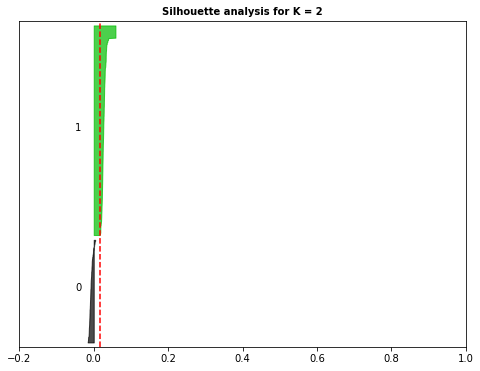

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


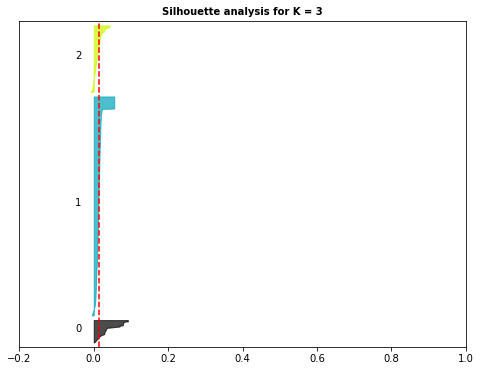

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


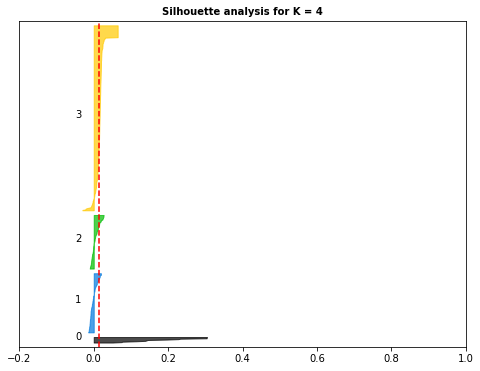

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


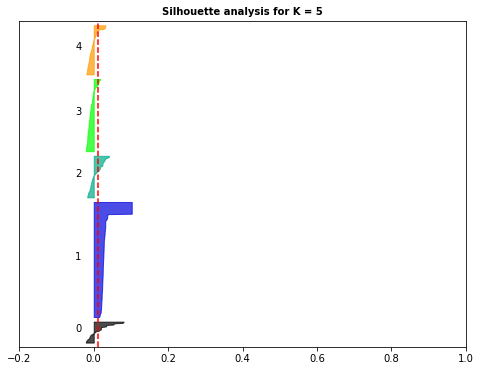

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


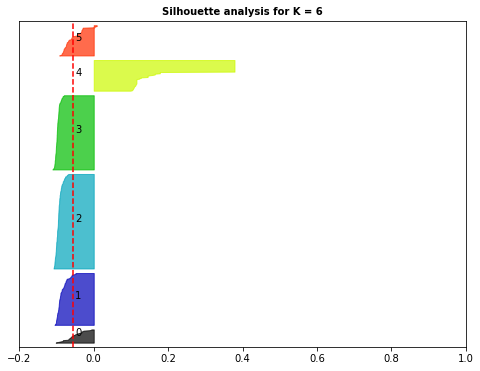

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


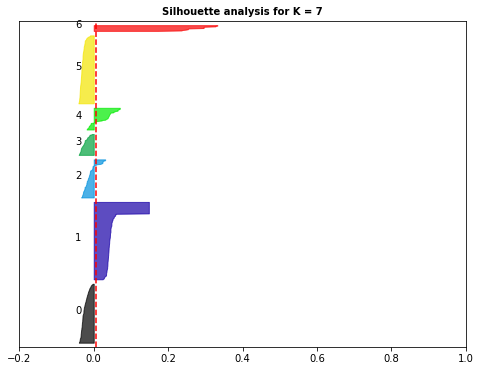

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


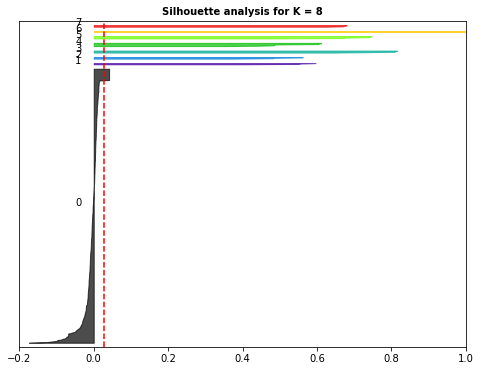

In [51]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

In [52]:
#Agora podemos escolher o melhor número de K e dar uma olhada mais profunda em cada cluster. Olhando para as parcelas acima,
#temos algumas pistas de que quando 2>= K <= 3 é quando os clusters são melhor definidos. Então, primeiro usaremos um histograma 
#simples para observar as palavras mais dominantes em cada grupo:

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


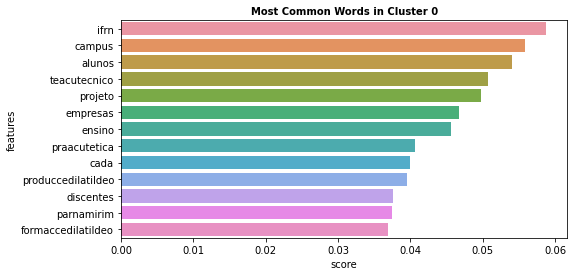

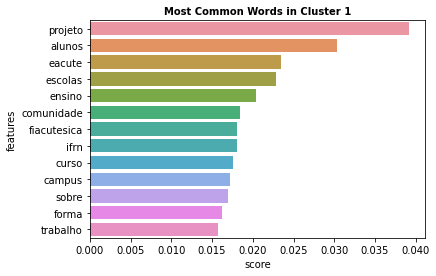

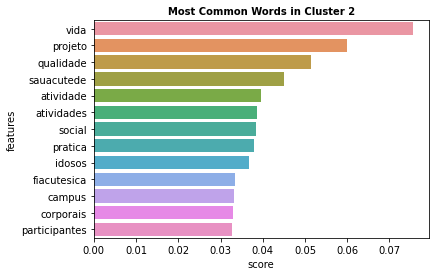

In [53]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

# Nuvem de palavras - Resultado da clusterização

In [54]:
#Map of Words
#Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(stopwords = stopwords, max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure(figsize=(10,5))
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

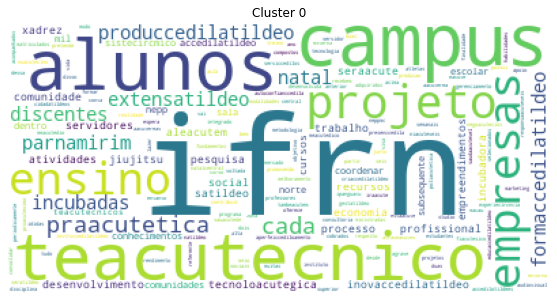

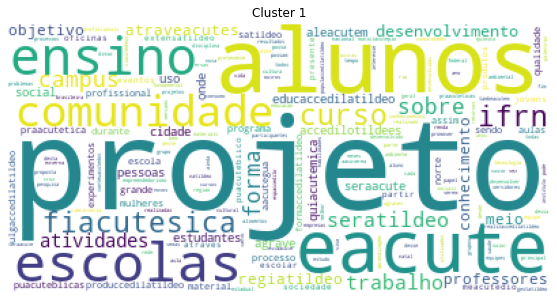

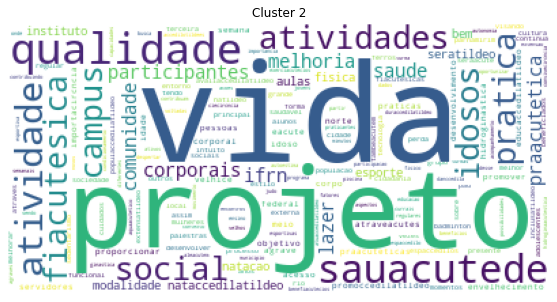

In [55]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [58]:
#Preparing our final groups for visualization
#Now that we're satisfied with our clustering we should assign which country belongs to which group.

# Assigning the cluster labels to each country
labels = kmeans.labels_ 
tres_areas['label'] = labels
tres_areas.head()

<ipython-input-58-2516c3fd83f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tres_areas['label'] = labels


,resumo,fim_execucao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus,label
3,O projeto apresentado objetiva a capacitação d...,2012-12-31,ADMINISTRAÇÃO,O projeto em foco tem como finalidade ofertar ...,Jorge Fernandes Jales Neto,13,2012-06-01,"Indústria, Construção Civil e Petróleo e Gás","Jorge Fernandes Jales Neto, Antonio Claudio No...",Qualificação em Processos Licitatórios do Gove...,MO,1
7,"Na sociedade globalizada, centrada no mercado,...",2012-12-21,EDUCAÇÃO FÍSICA,"Na sociedade globalizada, centrada no mercado,...",Flavio Alexandre Nunes de Franca,18,2012-06-01,"Cultura, Turismo e Lazer","Glênio Almeida de Freitas, Flavio Alexandre Nu...",Programa de Atendimento ao Idoso,CA,2
8,Aborda a questão da prática da atividade físic...,2012-12-31,SAÚDE COLETIVA,De acordo Cattean e Garoff (1999) Nadar á prat...,Edna de Oliveira Evaristo,19,2012-06-04,"Cultura, Turismo e Lazer","Rodolfo Duarte dos Santos Araujo da Silva, Ren...",NADO-HIDRO: a atividade aquática de natação e ...,CNAT,2
16,É consenso que a experimentação desp...,2012-12-31,QUÍMICA,"No ano de 2010, foi realizado um trabalho...",Luiz Carlos Domingos Batista,29,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...",Luiz Carlos Domingos Batista,Química Intinerante,JC,1
19,A pressão da modernidade representada pela inf...,2012-12-31,SAÚDE COLETIVA,A segurança no local de trabalho...,Miguel Cabral de Macedo Neto,33,2012-06-01,Multidisciplinar,"Kevia Kenny Barbosa de Oliveira, Francisco Rob...",O ENSINO A DISTANCIA NAS COMUNIDADES DE ASSU E...,ZL,1
